In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('online_retail_II.csv') #load the data from the csv file and create a dataframe

pd.set_option('display.max_columns', None) # make sure all columns of your DataFrame are shown when you print it out

In [3]:
df.head(6)# have a look at the top 6 rows of the dataframe

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom


In [4]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [5]:
print(f" the number of Rows are:  {df.shape[0]}, and columns are: {df.shape[1]}.")# understand the number of rows and columns in the dataframe.

 the number of Rows are:  1067371, and columns are: 8.


In [6]:
df.info() # show the summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [7]:
df.isnull().sum() #show how many missing (null) values are in each column

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

Observation summary:

- The dataset has a total of 1067371 rows and 12 columns
- The data type of the column is object
The columns in the dataset are 'Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'
- There are 4382 missing values in column 'Description', 243007 in column 'Customer ID', and while other columns have zero missing values

In [9]:
df.isnull().sum().sort_values(ascending = False) # sorting the missing values in the ascending order, with the largest on the top

Customer ID    243007
Description      4382
Invoice             0
StockCode           0
Quantity            0
InvoiceDate         0
Price               0
Country             0
dtype: int64

In [10]:
round(df.isnull().sum()/ len(df) *100,2).sort_values(ascending = False) # calculates the percentage of missing values in each column and sorts them with the highest percentages at the top.

Customer ID    22.77
Description     0.41
Invoice         0.00
StockCode       0.00
Quantity        0.00
InvoiceDate     0.00
Price           0.00
Country         0.00
dtype: float64

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

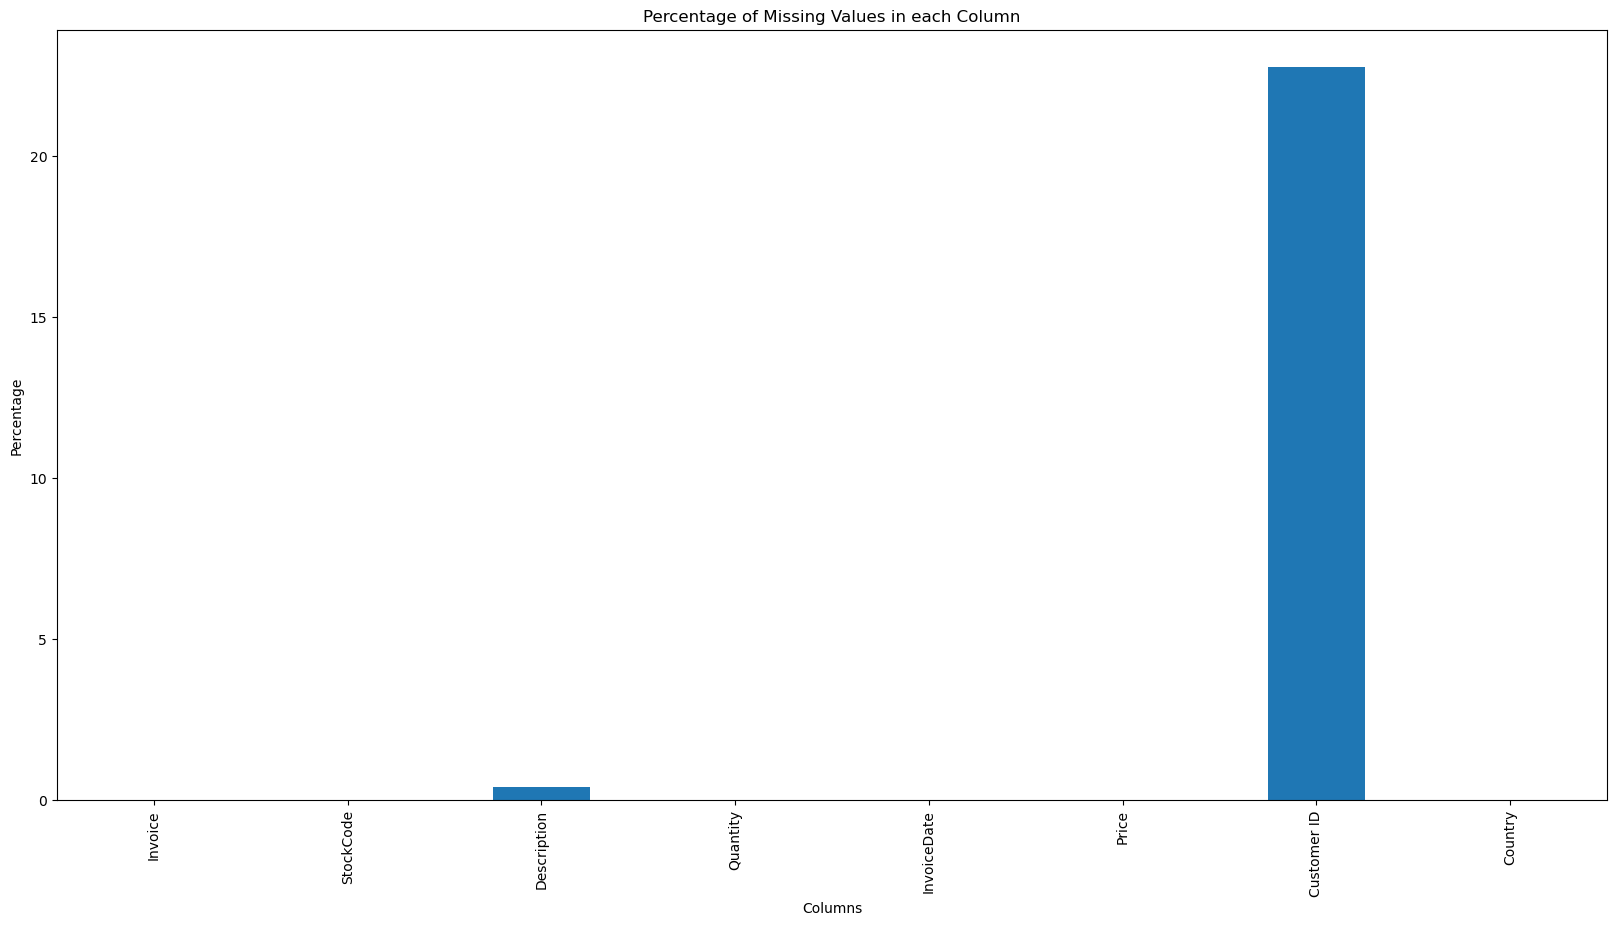

In [11]:
plt.figure(figsize=(20, 10))
# plot the missing values by their percentage in each column on a bar chart
missing_percentage = df.isnull().sum()/len(df)*100 
missing_percentage.plot(kind='bar')
# adding labels to the bar chart
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

In [12]:
df = df.dropna(subset=['Customer ID', 'Description']) # Drop rows where 'Customer ID' or 'Description' is missing
df = df.reset_index(drop=True) # Reset the index after dropping rows 

In [13]:
df.isnull().sum().sort_values(ascending = False) # sorting the missing values in the ascending order, with the largest on the top

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

All missing values have been removed 

In [14]:
df.duplicated().any() # checking for any duplicated data 

np.True_

In [17]:
df = df.drop_duplicates() # remove all duplicate to eliminate bias

In [16]:
df.duplicated().any() # Check to see if all the duplictes has been removed

np.False_

All duplicate removed

###  Understand customer behavior 

Milestone 1: Calculating the Recency, Frequency, Monetary 

In [19]:
df.describe()

,Quantity,Price,Customer ID
count,797885.000000,797885.000000,797885.000000
mean,12.602980,3.702732,15313.062777
std,191.670371,71.392549,1696.466663
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13964.000000
50%,5.000000,1.950000,15228.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [34]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # make sure dates are datetime objects
today = pd.Timestamp('2026-02-11') # most recent date 
recency = df.groupby('Customer ID')['InvoiceDate'].max().reset_index() # Find the last purchase data of each customer 

In [35]:
last_purchase['Recency'] = (today - last_purchase['InvoiceDate']).dt.days

print(last_purchase[['Customer ID', 'Recency']])

      Customer ID  Recency
0         12346.0     5502
1         12347.0     5179
2         12348.0     5252
3         12349.0     5195
4         12350.0     5487
...           ...      ...
5937      18283.0     5180
5938      18284.0     5606
5939      18285.0     5837
5940      18286.0     5653
5941      18287.0     5219

[5942 rows x 2 columns]


The results show that it's been more than 5000 days(over 15 years) since a customer made a purchase 

In [28]:
frequency = df.groupby('Customer ID').size().reset_index(name='Frequency') # Calculate frequency (number of purchases) for each customer

print(frequency)

      Customer ID  Frequency
0         12346.0         47
1         12347.0        222
2         12348.0         51
3         12349.0        180
4         12350.0         17
...           ...        ...
5937      18283.0        938
5938      18284.0         29
5939      18285.0         12
5940      18286.0         70
5941      18287.0        156

[5942 rows x 2 columns]


In [30]:
monetary = df.groupby('Customer ID')['Price'].sum().reset_index(name='Monetary') # calculate(monetary) how much money they spend 

print(monetary)

      Customer ID  Monetary
0         12346.0    567.50
1         12347.0    554.57
2         12348.0    193.10
3         12349.0   1504.59
4         12350.0     65.30
...           ...       ...
5937      18283.0   1651.60
5938      18284.0    116.09
5939      18285.0    100.20
5940      18286.0    306.55
5941      18287.0    348.89

[5942 rows x 2 columns]


Milestone 2: Assign Scores (1 to 5) to the three calculated metrices using Quantiles

In [37]:
# Recency
recency_df = df.groupby('Customer ID').InvoiceDate.max().reset_index()
recency_df['Recency'] = (today - recency_df['InvoiceDate']).dt.days

In [40]:
# Frequency
frequency_df = df.groupby('Customer ID').size().reset_index(name='Frequency')

In [42]:
# Monetary
monetary_df = df.groupby('Customer ID').Price.sum().reset_index(name='Monetary')

In [44]:
# merge results 
rfm = recency_df.merge(frequency_df, on='Customer ID').merge(monetary_df, on='Customer ID')
rfm = rfm[['Customer ID', 'Recency', 'Frequency', 'Monetary']]

In [45]:
#Recency: smaller values are better, so use qcut with ascending order reversed, where 5 is the most recent
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1])

In [46]:
# Frequency: higher is better, where 5 is the most frequent 
rfm['F_Score'] = pd.qcut(rfm['Frequency'], 5, labels=[1,2,3,4,5])

In [47]:
# Monetary: higher is better, where 5 is the most spender
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5])

In [48]:
# Convert to integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

print(rfm)

      Customer ID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score
0         12346.0     5502         47    567.50        2        3        4
1         12347.0     5179        222    554.57        5        5        4
2         12348.0     5252         51    193.10        3        3        3
3         12349.0     5195        180   1504.59        5        5        5
4         12350.0     5487         17     65.30        2        2        2
...           ...      ...        ...       ...      ...      ...      ...
5937      18283.0     5180        938   1651.60        5        5        5
5938      18284.0     5606         29    116.09        1        2        2
5939      18285.0     5837         12    100.20        1        1        2
5940      18286.0     5653         70    306.55        1        3        4
5941      18287.0     5219        156    348.89        4        4        4

[5942 rows x 7 columns]


Milestone 3: Grouping each csutomer based on their RFM score 

In [53]:
#making segments by combining the R, F, and M scores as a string
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
print(rfm[['Customer ID', 'RFM_Score']])

      Customer ID RFM_Score
0         12346.0       234
1         12347.0       554
2         12348.0       333
3         12349.0       555
4         12350.0       222
...           ...       ...
5937      18283.0       555
5938      18284.0       122
5939      18285.0       112
5940      18286.0       134
5941      18287.0       444

[5942 rows x 2 columns]


In [56]:
#Selecting only the RFM score columns for clustering
clustering_data = rfm[['R_Score', 'F_Score', 'M_Score']]

In [58]:
# Making clusters, where customers in the same cluster or with the same RFM_Score value have similar buying behaviors.
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(clustering_data)

print(rfm[['Customer ID', 'R_Score', 'F_Score', 'M_Score', 'Cluster']])

      Customer ID  R_Score  F_Score  M_Score  Cluster
0         12346.0        2        3        4        2
1         12347.0        5        5        4        1
2         12348.0        3        3        3        2
3         12349.0        5        5        5        1
4         12350.0        2        2        2        0
...           ...      ...      ...      ...      ...
5937      18283.0        5        5        5        1
5938      18284.0        1        2        2        0
5939      18285.0        1        1        2        0
5940      18286.0        1        3        4        2
5941      18287.0        4        4        4        1

[5942 rows x 5 columns]


Milestone 4: Suggesting a simple marketing ideas for each group

1. Customers in Cluster 1:  Loyal and best customers since they have High R, F, M Scores. We can provide them with the following: 
-  Special deals just for them.
-  Let them see new products before anyone else.
-  Points programs, freebies, or thank-you gifts.
-  Suggest products based on their purchase history.
-  Invitations to exclusive online or in-person events.

2. Customers in Cluster 2:  moderate and regular customers since they have medium R, F, M Scores. We can provide them with the following:
- Give them a deal if they buy multiple products together.
- Encourage bigger or more frequent purchases.
- Send gentle reminders about products they liked or bought before.
- Ask what would make them buy more and show you value their opinion.

3. Customers in Cluster 0:  Inactive and at-risk customers since they have very low R, F, and M Scores. We can provide them with the following:
- You can send them a re-engagement email, such as “We’ve missed you!” with a special discount or gift.
- Offer a one-time, big discount or free shipping.
- Encourage them to update their preferences or interests.
- Showcase bestsellers or new arrivals to get their attention.


Milstone 5: Visualizing the RFM segments with heatmaps and bar charts

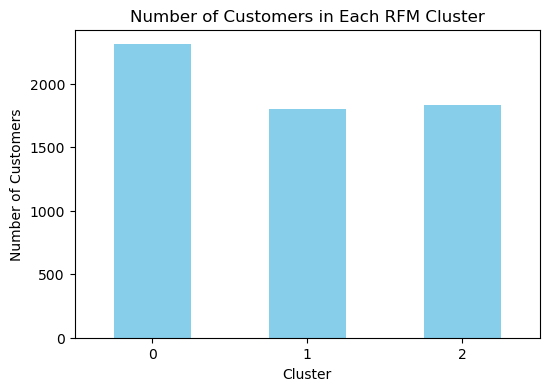

In [63]:
# Plotting the three different RFM clusters in a bar chart, which shows how many customers are in each group (Cluster 0, 1, 2, etc.).
cluster_counts = rfm['Cluster'].value_counts().sort_index()

plt.figure(figsize=(6,4))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Customers in Each RFM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

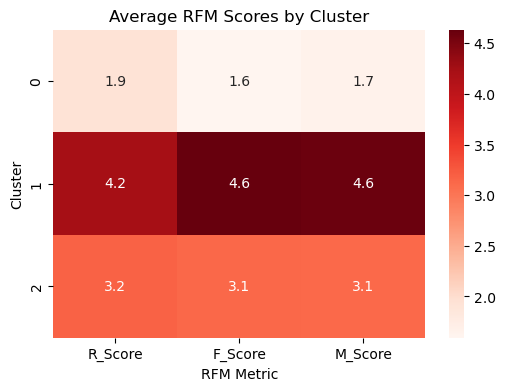

In [67]:
# Calculate average scores per cluster. 
#The heatmap shows the average Recency, Frequency, and Monetary scores for each cluster; darker red means higher values.
rfm_grouped = rfm.groupby('Cluster')[['R_Score', 'F_Score', 'M_Score']].mean()

plt.figure(figsize=(6,4))
sns.heatmap(rfm_grouped, annot=True, cmap='Reds', fmt=".1f")
plt.title('Average RFM Scores by Cluster')
plt.xlabel('RFM Metric')
plt.ylabel('Cluster')
plt.show()